# Introduction to Data Science: Loading and Visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data
### Loading Numeric Data with NumPy

In [2]:
x,y = np.loadtxt('./data/linear_data.txt', unpack=True)
print(x, y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23.]


#### The Delimiter Argument

A `delimiter` in Python is an argument that we pass to NumPy functions working with text files, like `numpy.loadtxt()` or `numpy.genfromtxt()`. 

The `delimiter` specifies which character separates the values in the text file we are using.

Common delimiters include:
|Delimiter|Symbol|
|------|----|
|Commas| `,`|
|Tabs|`\t`|
|Spaces| `" "`|

Here is an example of how we would specify a delimiter when loading data:
```python
# Our data file has comma separated values (csv), so we specify a comma for our delimiter.
data = np.loadtxt('example_data.csv', delimiter=',')
```

#### What if we want to analyze non-numeric or mixed type data? 

The `numpy.loadtxt()` function is ideally used with numerical data. For non-numeric or mixed type data, we can use `numpy.genfromtxt()`, which allows us to specify the data type that will be assigned to our data. We pass it the name of our data file, a delimiter, and a data type, `dtype`. If we have multiple data types in our file, we can set `dtype` to `None` and NumPy will figure out the data types for us.

In the following examples, note the format of the data when we print it. Look familiar? In these NumPy functions, the data is stored in a NumPy array, which we saw in module 2!  

In [3]:
# Our file has mixed data types, so we set 'dtype' to None.
mixed_data = np.genfromtxt('data/example_mixed_data.csv', delimiter=',', dtype=None, encoding=None)
print(mixed_data)

[['1.0' '2.0' '3.0']
 ['cat' 'dog' 'mouse']
 ['4.0' 'horse' '5.0']]


In [4]:
# We haven't specified 'dtype' so our function defaults to numeric data type
# Now the strings in our data are classified as 'nan' (not a number)
incorrect_mixed_data = np.genfromtxt('data/example_mixed_data.csv', delimiter=',')
print(incorrect_mixed_data)

[[ 1.  2.  3.]
 [nan nan nan]
 [ 4. nan  5.]]


## Pandas DataFrames

#### Tabular Data with Pandas

Pandas DataFrames are an extremely powerful tool for analyzing data!

In Pandas, the data is stored in a structure called a `DataFrame` instead of a NumPy array. 

Not only will Pandas automatically infer our data types, it will also automatically set the names of our columns using the first row of the data file. 

We can read in our data with Pandas like this:

In [5]:
# WINDOWS PATH
#staff_data = pd.read_csv('.\data\fall2024_python_staff.csv')

# MAC PATH
staff_data = pd.read_csv('./data/fall2024_python_staff.csv')

In [6]:
staff_data

,first_name,last_name,major,year,graduated,school,favorite_number
0,Kallee,Gallant,physics,NaN,True,Columbia,9
1,Abby,Pitcairn,computer science,senior,False,University of Southern Maine,7
2,Peter,Fitton,physics,junior,False,University of Southern Maine,1
3,Shreya,Singh,computer science,junior,False,Stanford,3
4,Silas,Pillsbury,philosophy,NaN,True,St. Johns College,6


#### Other Pandas Data Functions

`pd.read_csv` can work with other types of delimiters, not just commas. To do this, we simply specify what delimiter we are using in the function. In `pd.read_csv`, the delimiter is called `sep`, as in what is separating the data. 

```python
# Specify that our values are separated by tabs.
tab_data = pd.read_csv('example_data.tsv', sep='\t')
```

Pandas has other functions for parsing more complex file types. For example, when working with Excel spreadsheets, we can use the Pandas function `pd.read_excel` like this:
```python
# Read in data from an Excel spreadsheet. Specify which page of the spreadsheet.
excel_data = pd.read_excel('excel_data.xlsx', sheet_name='Sheet1')
```

## Indexing DataFrames


#### Using `loc` vs. `iloc` 

There are two ways we can access specific data from our Pandas `DataFrame`:
1. `loc`: location of data by column name
2. `iloc`: location of data by column index

For both `loc` and `iloc`, we specify row then column. This will locate one specific data point in the `DataFrame`.

In [7]:
# Row 4 is 'Silas', and column 2 is 'major'.
row_by_label = staff_data.loc[4, 'major']   # data from row index, column name
row_by_index = staff_data.iloc[4, 2]        # data from row index, column index

print("Using loc:", row_by_label)
print("Using iloc:", row_by_index)

Using loc: philosophy
Using iloc: philosophy


#### Accessing Data from an Entire Column

To access the data from an entire column, we can use dot notation or bracket notation.

- **Dot notation**: If a column has a name with no spaces or special characters, we can access it like an attribute.
- **Bracket notation**: For any column name, with or without spaces or special characters, we can put the column name in brackets.

Let's look at how we would use both these notations to access the first names from our staff data:

In [8]:
# Dot notation
first_names_dot = staff_data.first_name
#print(first_names_dot)

# Bracket notation
first_names_bracket = staff_data["first_name"]
#print(first_names_bracket)

#### Accessing Data from Multiple Columns

To access data from multiple columns, we can use brackets to specify row(s) then column(s). Like arrays, we can specify all rows/columns by using `:` as the index.

Let's look at a couple examples. In the first example, we print all staff's first and last names. By putting `:` as our row index, we access all rows. For columns, we specify the column names `first_name` and `last_name` in brackets. In the second example, we want the first and last names for only Peter and Shreya, so we pass `[2, 3]` instead of `:` as rows. 



In [9]:
# Access all full names from staff data using 'loc'
full_names = staff_data.loc[:, ["first_name", "last_name"]]
print(full_names)

  first_name  last_name
0     Kallee    Gallant
1       Abby   Pitcairn
2      Peter     Fitton
3     Shreya      Singh
4      Silas  Pillsbury


In [10]:
# Access full names of two specific staff using 'loc'
specific_full_names = staff_data.loc[[2,3], ["first_name", "last_name"]]
print(specific_full_names)

  first_name last_name
2      Peter    Fitton
3     Shreya     Singh


## Visualizing Data with Matplotlib

At the begining of this notebook we loaded `x` and `y` from `".\data\linear_data.txt"` with `numpy`.

We can use the plotting library `matplotlib` to visualize this data.

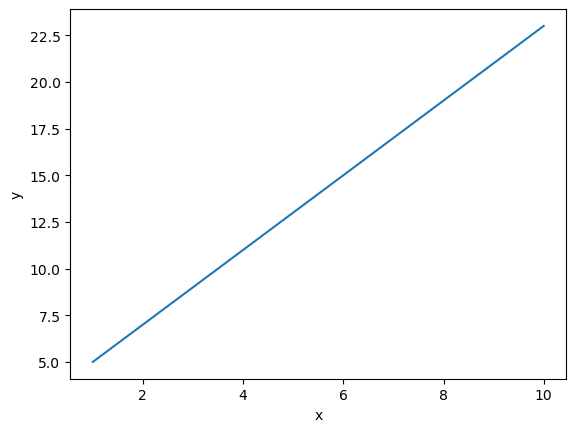

In [11]:
plt.plot(x,y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

Note the use of `plt.show`. It is best practice to call `show` whenever you want to display a plot to the screen.

We can also plot multiple lines on one plot with `plt.plot`. Simply call the function again or pass more arguments for more lines!

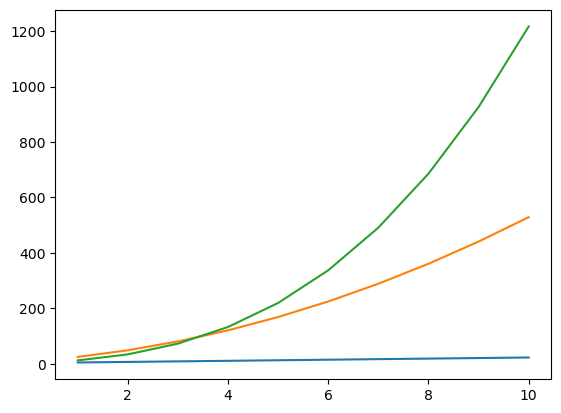

In [20]:
plt.plot(x,y)
plt.plot(x,y**2, x,0.1*y**3)
plt.show()

Not only can we plot multiple "lines" of data to a single figure, we can also use functions to generate the values we want.

Let's define a function $f(x)=(x-2)^3+3$ and plot the output of this with a single call to `plt.plot`.

In [13]:
def f(x):
    return (x-2)**3 + 3

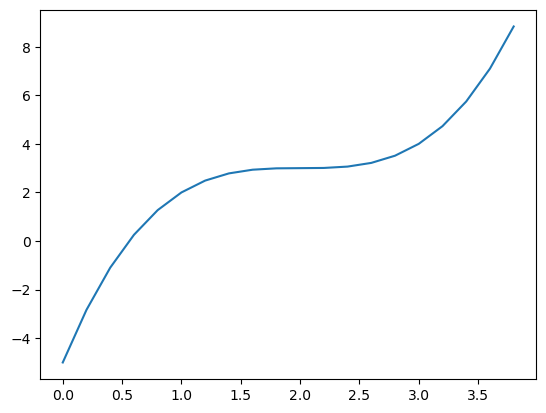

In [14]:
xs = np.arange(0., 4., 0.2)

plt.plot(xs,f(xs))
plt.show()

Another useful tool is a **lambda function**

Syntax: lambda *arguments* : *expression*

Use lambda functions when a simple function is required for a short period of time.

We can use a lambda function to reproduce the previous function `f(x)` given that only one expression needs to be evaluated.

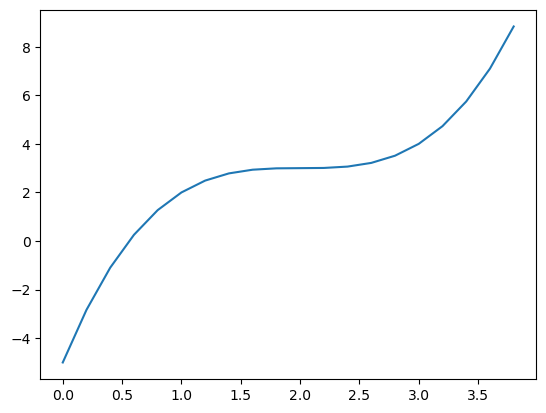

In [15]:
g = lambda x : (x-2)**3 + 3

plt.plot(xs,g(xs))
plt.show()